In [ ]:
# experimental: you can run this cell to see your code full-width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import requests
import seaborn as sns
import string

## 2. Set up API credentials and base URL

In [2]:
MY_API_KEY = "b7c62157-8d51-451b-b93c-27578266c0fd"
API_ENDPOINT = 'http://content.guardianapis.com/search'

## 3. Searching the Guardian API and collecting data

In [3]:
# Define search query
query = 'rain' or 'raining'

In [4]:
# Define the parameters for the API call
my_params = {
    'from-date': '2023-01-01',  #this specifies the date to collect data from
    'order-by': 'oldest',       #this means the results are ordered by oldest to newest
    'show-fields': 'all',       #this specifies to give all the information stored for each item in the results
    'query-fields': 'body',     #this specifies in which indexed field to search for the query 
    'q': query,                 #this is the query
    'page-size': 200,           #this specifies the number of results returned per page
    'api-key': MY_API_KEY       #API key
}

In [5]:
# Collect search results in data frame
current_page = 1                                            # we start at page 1
total_pages = float('inf')                                  # set to infinity to ensure that loop runs until there are no more pages left
df_all = pd.DataFrame()                                     # dataframe to store all the results

while current_page <= total_pages:                          # while loop to check for results for each current page 
    print("... extracting results from page", current_page) # prints which page the code is on
    try:                                                    # the while loop then tries to do the following:
        my_params['page'] = current_page                    # adds an additional search parameter ('page') to collect the current page which increase with each iteration
        r = requests.get(API_ENDPOINT, my_params)           # API request to collect the data for the specified page
        data = r.json()                                     # turns the results into Json
        news_items = data['response']['results']            # extracts the news items from the results for the page
        df_page = pd.json_normalize(news_items)             # flattens the Json structure into a flat data frame table
        df_all = pd.concat([df_all, df_page], ignore_index=True) # appends the data frame for the pa
    except Exception as e:                                  # unless there is an error
        print(f"Error: {e}")                                # at that point the code prints an error message 
        break                                               # and the while loop is interrupted
    total_pages = data['response']['pages']                 # the number of pages available for a search is extracted from the data
    current_page += 1                                       # the current page is incremented by 1 for the next iteration

... extracting results from page 1
... extracting results from page 2
... extracting results from page 3
... extracting results from page 4
... extracting results from page 5
... extracting results from page 6
... extracting results from page 7
... extracting results from page 8
... extracting results from page 9
... extracting results from page 10
... extracting results from page 11
... extracting results from page 12


In [6]:
# Print the first 5 rows of the data frame
df_all.head(5)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,...,fields.bylineHtml,fields.showTableOfContents,fields.liveBloggingNow,fields.newspaperPageNumber,fields.commentable,fields.newspaperEditionDate,fields.commentCloseDate,fields.displayHint,fields.starRating,fields.sensitive
0,world/2023/jan/01/new-years-eve-celebrations-f...,article,world,World news,2023-01-01T01:27:23Z,New Year’s Eve celebrations: fireworks and fes...,https://www.theguardian.com/world/2023/jan/01/...,https://content.guardianapis.com/world/2023/ja...,False,pillar/news,...,"<a href=""profile/martin-belam"">Martin Belam</a...",false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,australia-news/live/2023/jan/01/australia-live...,liveblog,australia-news,Australia news,2023-01-01T05:32:10Z,Australia to introduce testing measures for pe...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,pillar/news,...,"<a href=""profile/lisa-cox"">Lisa Cox</a> (now) ...",false,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,travel/2023/jan/01/dreams-of-escape-island-adv...,article,travel,Travel,2023-01-01T11:00:44Z,Dreams of escape: island adventures in the Lak...,https://www.theguardian.com/travel/2023/jan/01...,https://content.guardianapis.com/travel/2023/j...,False,pillar/lifestyle,...,Robert Twigger,false,NaN,35,false,2023-01-01T00:00:00Z,NaN,NaN,NaN,NaN
3,uk-news/2023/jan/01/total-of-45756-people-cros...,article,uk-news,UK news,2023-01-01T13:34:44Z,"Channel crossings: 45,756 people came to UK in...",https://www.theguardian.com/uk-news/2023/jan/0...,https://content.guardianapis.com/uk-news/2023/...,False,pillar/news,...,"<a href=""profile/jessica-elgot"">Jessica Elgot<...",false,NaN,9,NaN,2023-01-02T00:00:00Z,NaN,NaN,NaN,NaN
4,music/2023/jan/02/robert-forster-venus-by-tele...,article,music,Music,2023-01-01T14:00:48Z,Robert Forster: Venus by Television is the mos...,https://www.theguardian.com/music/2023/jan/02/...,https://content.guardianapis.com/music/2023/ja...,False,pillar/arts,...,Robert Forster,false,NaN,NaN,true,NaN,2023-01-04T14:00:48Z,NaN,NaN,NaN


In [7]:
# Check total number of articles in the dataset
df_all.shape

(2285, 45)

## 4. Analysing Guardian news data

### 4.1 Tokenising and cleaning text

In [8]:
# Collecting all the articles from the data frame and tokenise the text
from nltk.tokenize import word_tokenize                          # import word tokeniser
nltk.download('punkt')                                           # download the punkt tokeniser

articles = df_all['fields.bodyText'].tolist()                    # collect list of articles from data frame
articles_join = " ".join(articles)                               # join the strings of all articles into one big text string
articles_join_tokens = word_tokenize(articles_join)              # tokenise list of words in the text
lower_articles = [word.lower() for word in articles_join_tokens] # lowercase list of words

print(len(lower_articles))                                       # print number of tokens

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


6036662


### 4.2 Remove stop words and any other words that not interesting

In [9]:
# Remove some stopwords (incl. a long list of uninteresting words,
# which can be adapted as necessary)
nltk.download('stopwords')
from nltk.corpus import stopwords
uninteresting_words=['’','‘','“','”','–',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + uninteresting_words)

filtered_text = [token 
                 for token in lower_articles 
                 if not token in remove_these]

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.3 Plotting word frequency (for 25 most common tokens)

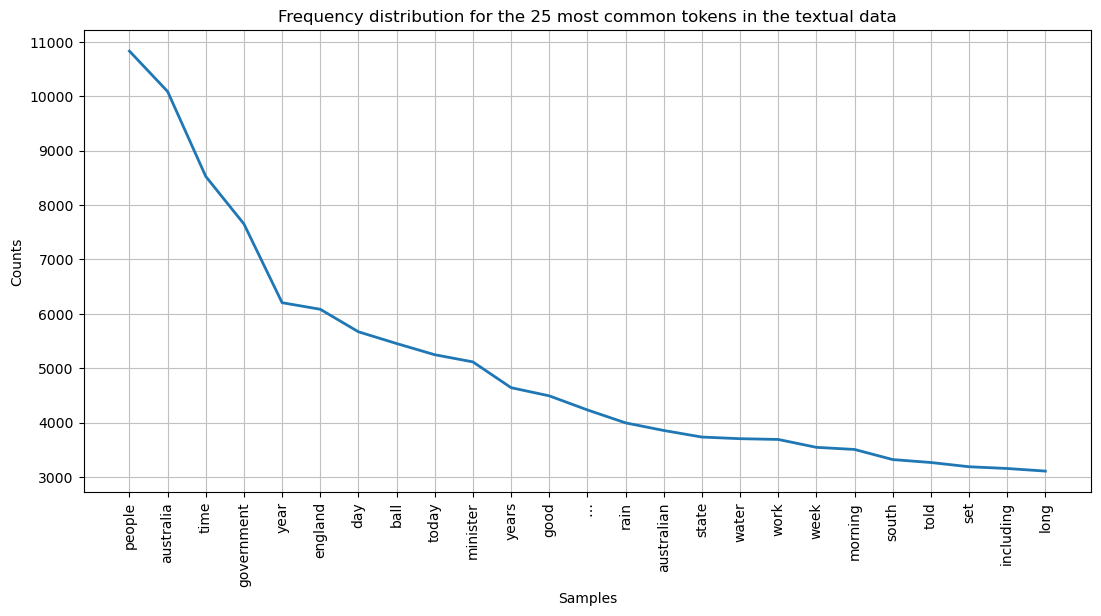

<Axes: title={'center': 'Frequency distribution for the 25 most common tokens in the textual data'}, xlabel='Samples', ylabel='Counts'>

In [10]:
from nltk.probability import FreqDist
frequencies = FreqDist(filtered_text)

fig, ax = plt.subplots(figsize=(13,6))
frequencies.plot(25,title='Frequency distribution for the 25 most common tokens in the textual data')

### 4.4 Lemmatizing the rainwear clothing types

We use lemmatization technique to include all the rainwear clothing type for plotting the frequency distribution. This means, for counting the mentions of hat we consider both the words 'hat' and 'hats'

In [11]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# Import the WordNetLemmatizer module and initialise it
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Create a list of lemmatized clothes (i.e., include both hat and hats)
lemmatised_clothes=[]
for text in filtered_text:
    lemmatised_clothes.append(lemmatizer.lemmatize(text))

In [14]:
from nltk.probability import FreqDist
frequencies_lemmatisation = FreqDist(lemmatised_clothes)

### 4.5 Side by side frequency bar graphs of cities and rainwear clothing types for ease of comparison

We plot frequency graphs of mentions of cities and the rainwear clothing type in the articles to compare which city has high mentions of a particular rainwear clothing type. This will help to make decisions in prioritizing the sale of a rainwear clothing in a particular city

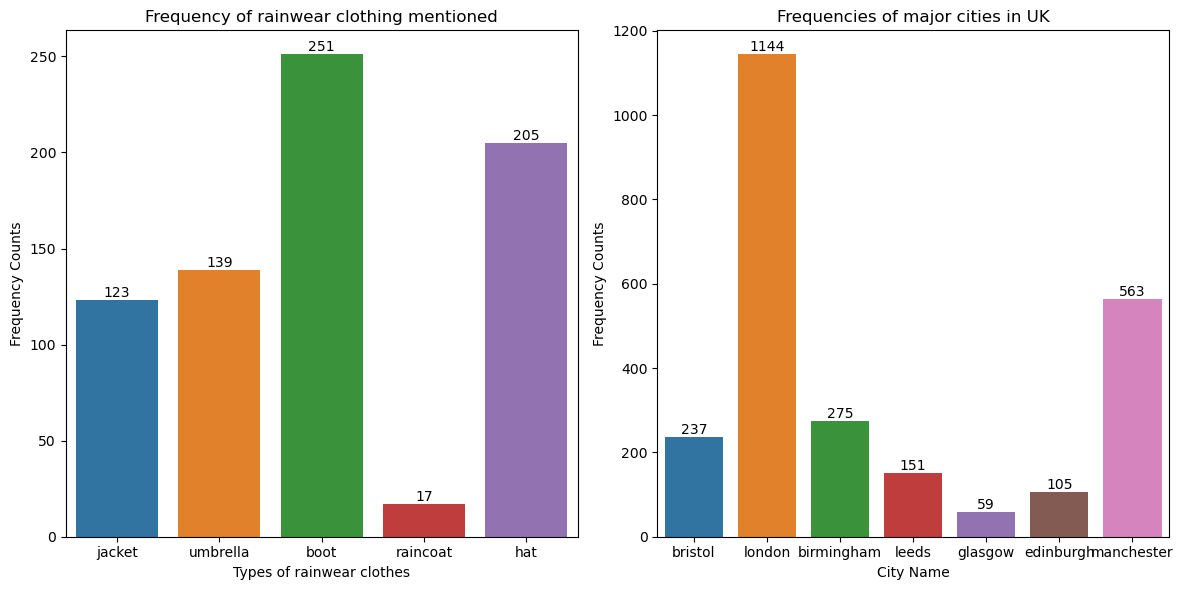

In [15]:
# First histogram for rainwear clothing type frequencies
target_clothes = ["jacket", "umbrella", "boot", "raincoat", "hat"]
clothes_dict = {}
for cloth in target_clothes:
    clothes_dict[cloth] = frequencies_lemmatisation[cloth]

# Create a pandas series for the first dictionary
clothes_dataframe = pd.Series(clothes_dict)

# Second histogram for city frequencies
target_cities = ["bristol", "london", "birmingham", "leeds", "glasgow", "edinburgh", 'manchester']
cities_dict = {}
for city in target_cities:
    cities_dict[city] = frequencies[city]

# Create a pandas series for the second dictionary
cities_dataframe = pd.Series(cities_dict)

# Create subplots in a single figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the first barplot on the left subplot
sns.barplot(x=clothes_dataframe.index, y=clothes_dataframe.values, ax=axes[0])
axes[0].set_title('Frequency of rainwear clothing mentioned')
axes[0].set_xlabel('Types of rainwear clothes')
axes[0].set_ylabel('Frequency Counts')
axes[0].tick_params(axis='x', rotation=0)

# Add labels above each bar in the left subplot
for i, v in enumerate(clothes_dataframe.values):
    axes[0].annotate(str(v), (i, v), ha='center', va='bottom')

# Create the second barplot on the right subplot
sns.barplot(x=cities_dataframe.index, y=cities_dataframe.values, ax=axes[1])
axes[1].set_title('Frequencies of major cities in UK')
axes[1].set_xlabel('City Name')
axes[1].set_ylabel('Frequency Counts')
axes[1].tick_params(axis='x', rotation=0)

# Add labels above each bar in the right subplot
for i, v in enumerate(cities_dataframe.values):
    axes[1].annotate(str(v), (i, v), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined histograms side by side
plt.show()

### 4.6 Plotting heatmap and scatter plot for counting the number of articles having a correlation of cities and rainwear clothing types

We plot a heatmap to count the number of articles having mentions of a particular city and the type of rainwear clothing sold in that city. We also plot a scatter plot to visualize the total number of articles to understand which city has the highest rainwear clothing being sold and could be a potential market for a particular rainwear clothing type

In [16]:
# Define lists for the cities and rainwear clothing types

cities = ["bristol","london","birmingham","leeds","glasgow","edinburgh",'manchester']
clothes = ["jacket","jackets","umbrella","umbrellas","boot","boots","raincoat","raincoats","hat","hats"]

In [17]:
# Create a DataFrame to store the co-occurrence counts of cities and the rainwear clothing types

co_occurrence_matrix = pd.DataFrame(0, index=cities, columns=clothes)

# Iterate through the DataFrame and count co-occurrences
for index, row in df_all.iterrows():
    for cloth in clothes:
        for city in cities:
            if city in row['fields.bodyText'].lower() and cloth in row['fields.bodyText'].lower():
                co_occurrence_matrix.at[city, cloth] += 1

co_occurrence_matrix

,jacket,jackets,umbrella,umbrellas,boot,boots,raincoat,raincoats,hat,hats
bristol,5,2,4,1,15,7,0,0,82,11
london,35,12,30,18,77,36,6,2,500,64
birmingham,7,1,4,2,26,8,0,0,115,15
leeds,0,0,4,3,15,4,1,1,79,10
glasgow,3,1,3,2,7,4,0,0,42,4
edinburgh,4,3,6,4,5,3,0,0,62,8
manchester,10,1,12,7,38,11,2,0,226,35


In [18]:
# Consolidated dataframe to combine the values of similar rainwear clothing
# i.e., combining 'hat' and 'hats' column in the co_occurence_matrix

# Select the desired clothing items
target_clothes = ["jacket", "umbrella", "boot", "raincoat", "hat"]

# Create a new DataFrame for the selected clothing items to consolidate the counts for "hat" and "hats"
consolidated_df = co_occurrence_matrix[target_clothes]

for city in co_occurrence_matrix.index:
    for cloth in target_clothes:
        if cloth+'s' in co_occurrence_matrix.columns and cloth in co_occurrence_matrix.columns:
            consolidated_df.at[city, cloth] = co_occurrence_matrix.at[city, cloth]+co_occurrence_matrix.at[city, cloth+'s']

In [19]:
# Add an additional column in the consolidated dataframe to display the total articles 

consolidated_df['Total Mention of Articles'] = consolidated_df[['jacket', 'umbrella', 'boot', 'raincoat', 'hat']].sum(axis=1)
consolidated_df = pd.DataFrame(consolidated_df, index=cities)
consolidated_df = consolidated_df.rename_axis('city')

consolidated_df

/tmp/ipykernel_140/3099933380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consolidated_df['Total Mention of Articles'] = consolidated_df[['jacket', 'umbrella', 'boot', 'raincoat', 'hat']].sum(axis=1)


,jacket,umbrella,boot,raincoat,hat,Total Mention of Articles
city,,,,,,
bristol,7,5,22,0,93,127
london,47,48,113,8,564,780
birmingham,8,6,34,0,130,178
leeds,0,7,19,2,89,117
glasgow,4,5,11,0,46,66
edinburgh,7,10,8,0,70,95
manchester,11,19,49,2,261,342


## 5. Final graph for evaluation and mini report

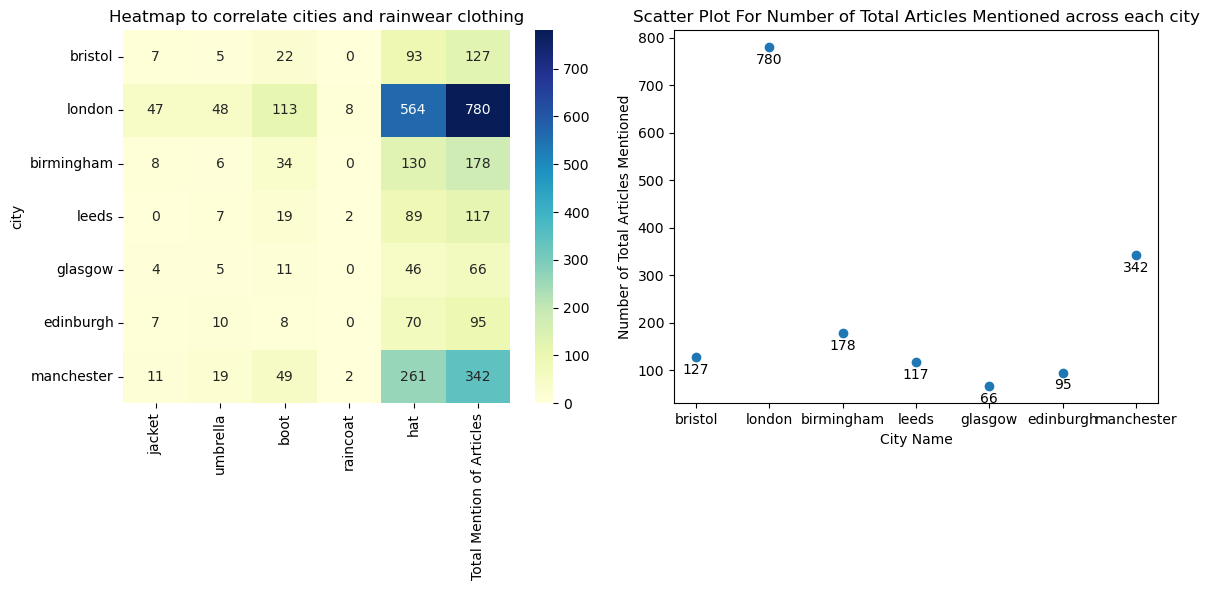

In [20]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the heatmap on the first subplot (ax1)
sns.heatmap(consolidated_df, annot=True, fmt='d', cmap='YlGnBu', ax=ax1)
ax1.set_title('Heatmap to correlate cities and rainwear clothing')

# Create the scatter plot on the second subplot (ax2)
ax2.scatter(consolidated_df.index, consolidated_df['Total Mention of Articles'])
ax2.set_title('Scatter Plot For Number of Total Articles Mentioned across each city')
ax2.set_xlabel('City Name')
ax2.set_ylabel('Number of Total Articles Mentioned')

for i, count in enumerate(consolidated_df['Total Mention of Articles']):
    ax2.annotate(count, (consolidated_df.index[i], count), textcoords="offset points", xytext=(0, -12), ha='center')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

**Business Question:**
"Which type of rainwear clothing should be prioritized in the major cities of UK to maximize profits?"
 
**Mini Report:**

From the Guardian API, we extracted articles comprising of the words "rain" and "raining" for answering the business question. The text data in the extracted articles was tokenized and cleaned for analysis purpose.
 
A preliminary analysis of the data on plotting side by side bar graphs, revealed that “London” and “Manchester” were the most frequently mentioned cities in relation to rainwear clothing. Among the rainwear clothing types, "Hats" and "Boots" were the most frequently mentioned. To ensure comprehensive analysis, we lemmatized the terms, such as combining "hat" and "hats" for a more accurate representation of the total hats.

We further visualized our findings through a heatmap and scatter plot, assessing the correlation between specific cities and rainwear clothing types. The results indicated that London and Manchester had the highest article counts, signifying their significance in rainwear clothing sales. The heatmap reinforced our conclusion that "Hats" and "Boots" were the major contributors to rainwear clothing sales. Therefore, to maximize profits in major UK cities like London and Manchester, prioritizing sales of "Hats" and "Boots" is recommended.